# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_csv('TSNE_Exercise_1.csv')
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
7597,-35.000153,-2.157631,15.825675,0,0
25119,9.086946,10.082130,3.852993,4,4
18434,-5.254629,10.299657,-11.474824,3,3
58610,-5.893230,16.977411,16.218210,10,10
72061,32.437447,16.609234,4.806024,12,12


In [3]:
raw_data.shape

(75043, 5)

In [4]:
raw_data.columns

Index(['TSNE Element 1', 'TSNE Element 2', 'TSNE Element 3', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75043 entries, 0 to 75042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TSNE Element 1  75043 non-null  float64
 1   TSNE Element 2  75043 non-null  float64
 2   TSNE Element 3  75043 non-null  float64
 3   stimulus        75043 non-null  int64  
 4   restimulus      75043 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 2.9 MB


In [6]:
raw_data.describe(include='all')

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
count,75043.000000,75043.000000,75043.000000,75043.000000,75043.000000
mean,-2.068854,0.606696,-0.949898,3.071013,3.071013
std,17.898981,17.470816,17.422314,3.960700,3.960700
min,-45.873047,-44.015465,-43.255806,0.000000,0.000000
25%,-15.781640,-11.807723,-13.729074,0.000000,0.000000
50%,-3.376247,1.154499,-0.702933,0.000000,0.000000
75%,12.740274,13.490080,11.381753,6.000000,6.000000
max,41.581650,43.514896,43.077790,12.000000,12.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     38203
5      3952
1      3738
3      3706
12     3125
6      3058
10     3038
4      2982
8      2909
2      2618
7      2615
9      2608
11     2491
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

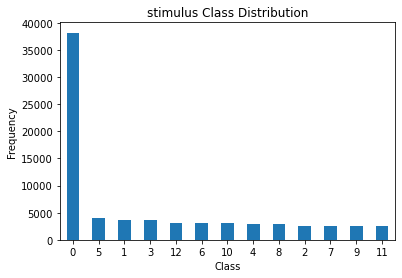

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
61386,-2.463859,-36.793602,15.708158,10,10
66319,15.574925,-20.868670,29.904636,0,0
3578,-26.735600,-22.400686,-1.293670,0,0
60565,-5.860095,13.618052,13.168698,10,10
37156,2.393845,-8.268440,-7.353910,0,0


In [11]:
raw_data.shape

(75043, 5)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75043 entries, 0 to 75042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TSNE Element 1  75043 non-null  float64
 1   TSNE Element 2  75043 non-null  float64
 2   TSNE Element 3  75043 non-null  float64
 3   stimulus        75043 non-null  int64  
 4   restimulus      75043 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 2.9 MB


In [13]:
print(raw_data.isnull().any())

TSNE Element 1    False
TSNE Element 2    False
TSNE Element 3    False
stimulus          False
restimulus        False
dtype: bool


In [14]:
X = raw_data.iloc[:,0:3]
y = raw_data.stimulus

# Splitting data for training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 39)

# Machine Learning Models

# Decision Tree

In [16]:
from sklearn import tree
import time
start_time = time.time()
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

1.4413166046142578 seconds


In [17]:
y_pred1 = tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 85.00999333777482


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      3862
           1       0.78      0.80      0.79       361
           2       0.81      0.81      0.81       232
           3       0.77      0.78      0.77       379
           4       0.92      0.89      0.90       314
           5       0.86      0.91      0.89       388
           6       0.80      0.80      0.80       319
           7       0.90      0.92      0.91       265
           8       0.86      0.84      0.85       319
           9       0.77      0.77      0.77       240
          10       0.78      0.72      0.75       310
          11       0.71      0.72      0.71       219
          12       0.52      0.54      0.53       297

    accuracy                           0.85      7505
   macro avg       0.80      0.80      0.80      7505
weighted avg       0.85      0.85      0.85      7505

Confusion Matrix : 


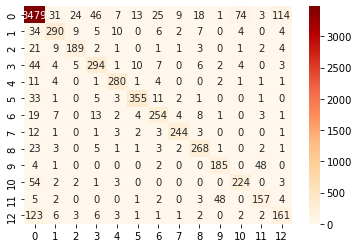

In [19]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.9397734843437708
MSE: 8.457961359093938
RMSE: 2.908257443744267


In [21]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8508070403536303
Recall Score :  0.8500999333777481
f1_score :  0.850334596644303


# KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'brute',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'uniform')
KNeighborsClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.00998067855834961 seconds


In [23]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 88.66089273817454


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93      3862
           1       0.83      0.86      0.84       361
           2       0.88      0.81      0.84       232
           3       0.83      0.78      0.80       379
           4       0.92      0.89      0.91       314
           5       0.93      0.89      0.91       388
           6       0.84      0.79      0.81       319
           7       0.97      0.91      0.94       265
           8       0.94      0.83      0.89       319
           9       0.78      0.85      0.81       240
          10       0.91      0.72      0.81       310
          11       0.82      0.67      0.74       219
          12       0.84      0.43      0.57       297

    accuracy                           0.89      7505
   macro avg       0.88      0.80      0.83      7505
weighted avg       0.89      0.89      0.88      7505

Confusion Matrix : 


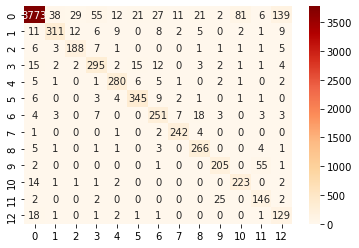

In [25]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.6676882078614257
MSE: 5.881812125249834
RMSE: 2.425244755741126


In [27]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8858932285947388
Recall Score :  0.8866089273817455
f1_score :  0.8816730522523902


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 100,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

59.69697284698486 seconds


In [29]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 88.34110592938042


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3862
           1       0.85      0.82      0.83       361
           2       0.86      0.82      0.84       232
           3       0.81      0.80      0.81       379
           4       0.94      0.87      0.91       314
           5       0.93      0.90      0.91       388
           6       0.88      0.82      0.85       319
           7       0.96      0.94      0.95       265
           8       0.92      0.87      0.89       319
           9       0.87      0.78      0.82       240
          10       0.86      0.74      0.79       310
          11       0.76      0.81      0.78       219
          12       0.66      0.49      0.56       297

    accuracy                           0.88      7505
   macro avg       0.86      0.82      0.84      7505
weighted avg       0.88      0.88      0.88      7505

Confusion Matrix : 


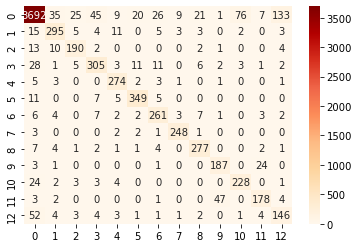

In [31]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7297801465689541
MSE: 6.592804796802132
RMSE: 2.5676457693385455


In [33]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8809995195928594
Recall Score :  0.8834110592938041
f1_score :  0.8808179062142303


# ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import time
start_time = time.time()
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 100,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

18.503084659576416 seconds


In [35]:
y_pred5 = extratree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 88.42105263157895


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3862
           1       0.86      0.83      0.85       361
           2       0.86      0.82      0.84       232
           3       0.81      0.81      0.81       379
           4       0.94      0.89      0.91       314
           5       0.92      0.92      0.92       388
           6       0.88      0.84      0.86       319
           7       0.97      0.94      0.95       265
           8       0.92      0.88      0.90       319
           9       0.85      0.80      0.82       240
          10       0.85      0.75      0.79       310
          11       0.76      0.80      0.78       219
          12       0.63      0.51      0.56       297

    accuracy                           0.88      7505
   macro avg       0.86      0.82      0.84      7505
weighted avg       0.88      0.88      0.88      7505

Confusion Matrix : 


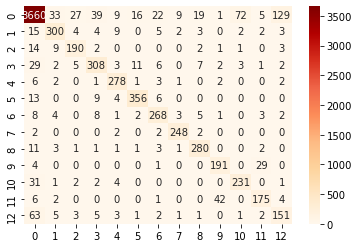

In [37]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.7417721518987341
MSE: 6.791072618254497
RMSE: 2.605968652584773


In [39]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.8818868344109895
Recall Score :  0.8842105263157894
f1_score :  0.8822396199813627


# XGBoost

In [40]:
from xgboost import XGBClassifier
import time
start_time = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:23:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
143.8045346736908 seconds


In [41]:
y_pred4 = xgb.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 87.48834110592938


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3862
           1       0.84      0.77      0.81       361
           2       0.86      0.79      0.82       232
           3       0.78      0.80      0.79       379
           4       0.95      0.84      0.89       314
           5       0.90      0.87      0.88       388
           6       0.86      0.72      0.78       319
           7       0.93      0.92      0.93       265
           8       0.92      0.83      0.87       319
           9       0.84      0.72      0.78       240
          10       0.90      0.69      0.78       310
          11       0.71      0.74      0.72       219
          12       0.83      0.44      0.57       297

    accuracy                           0.87      7505
   macro avg       0.86      0.78      0.81      7505
weighted avg       0.87      0.87      0.87      7505

Confusion Matrix : 


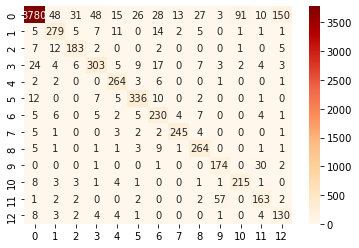

In [43]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.724450366422385
MSE: 6.241572285143238
RMSE: 2.498313888434205


In [45]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8742244476289689
Recall Score :  0.8748834110592938
f1_score :  0.8696299335136443
